The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

#### I will try to apply KNN and SVM on the dataset and try to improve their performances

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style = 'whitegrid'
%matplotlib inline

In [2]:
iris = pd.read_csv('Iris.csv',index_col=0)

#### Let's check the head of the Dataset

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### Some exploratory data analysis

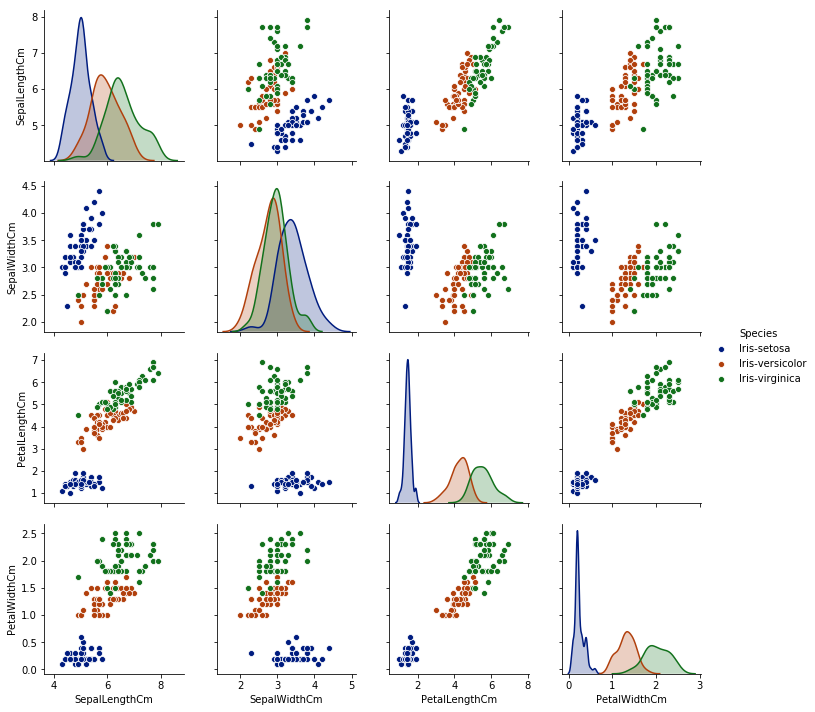

In [4]:
sns.pairplot(iris,hue='Species',palette='dark', markers='o')
plt.show()

#### From the pairplot we can identify that Setosa is the most seperable from other species

### Creating a kde plot of sepal_length versus sepal width for Setosa species

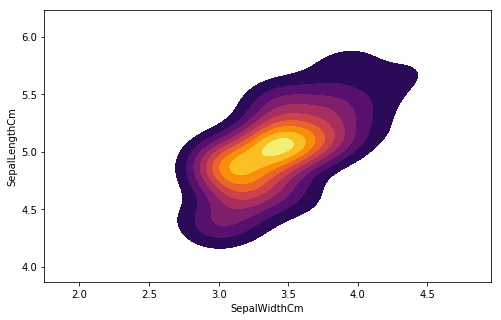

In [5]:
setosa = iris[iris['Species']=='Iris-setosa']
plt.figure(figsize=(8,5))
sns.kdeplot( setosa['SepalWidthCm'], setosa['SepalLengthCm'],cmap="inferno", shade=True, shade_lowest=False)
plt.show()

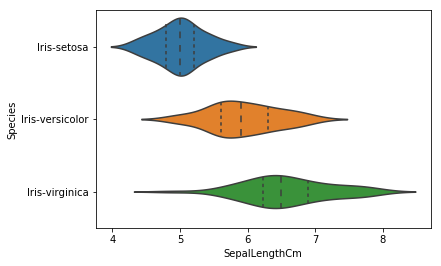

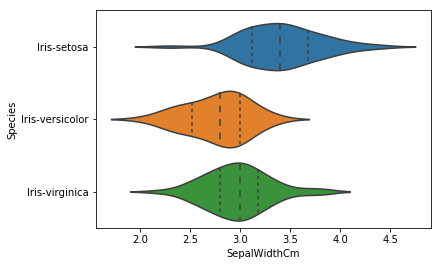

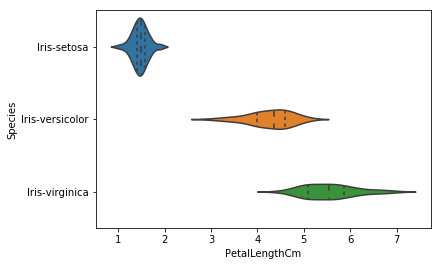

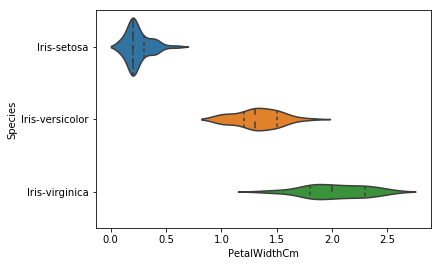

In [6]:
sns.violinplot(y='Species', x='SepalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=iris, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=iris, inner='quartile')
plt.show()

### Standardizing the variables for applying KNN

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [8]:
scaler.fit(iris.drop('Species',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(iris.drop('Species',axis=1))

In [10]:
df = pd.DataFrame(scaled_features,columns=iris.columns[:-1])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,iris['Species'],test_size=0.3, random_state=55)

### Applying KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Starting with k=1
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
pred = knn.predict(X_test)

### Predictions and Evaluations

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[14  1  0]
 [ 0 14  2]
 [ 0  0 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.93      0.88      0.90        16
 Iris-virginica       0.88      1.00      0.93        14

      micro avg       0.93      0.93      0.93        45
      macro avg       0.94      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(y_test,pred)
print("KNN Accuracy: %.2f%%" % (accuracy * 100.0))

KNN Accuracy: 93.33%


#### The accuracy is not bad. Trying to explore whether a better K value can be chosen or not

### Choosing a k value

In [18]:
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

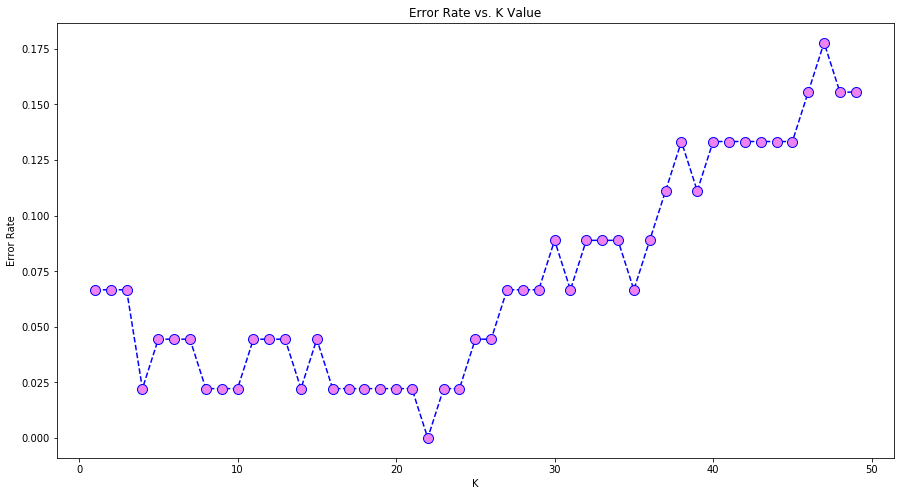

In [19]:
plt.figure(figsize=(15,8))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='violet', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#### As we can see here in this case, higher the K value after 25, the error rate is getting higher.
#### k = 1  was a good choice, still we will try to apply k = 5 to see the results.  We are not applying k=20 or k=22 as that may overfit the model 

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[14  1  0]
 [ 0 15  1]
 [ 0  0 14]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.93      1.00      0.97        14

      micro avg       0.96      0.96      0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



#### As we can see from the confusion matrix, 2 points are there hard to get. Trying to get those 2 points the model can be overfitted.

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(y_test,pred)
print("KNN Accuracy: %.2f%%" % (accuracy * 100.0))

KNN Accuracy: 95.56%


### Applying SVM

In [22]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Train-test split for SVM, as we don't want the scaled features to put in our SVM model

X_svm = iris.drop('Species',axis=1)
y_svm = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.3,random_state=60)



#### Trainng the SVM model

In [24]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Model Evaluation

In [25]:
predictions = svc_model.predict(X_test)

In [26]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[18  0  0]
 [ 0 13  1]
 [ 0  1 12]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.92      0.92      0.92        13

      micro avg       0.96      0.96      0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.56%


#### The model is pretty good, but still we couldn't classify those two points that couldn't be classified with the KNN model.
#### But we can try to tune the parameters to get a even better result (just for practice)

#### To tune the hyperparameters, we will use the GridSearch method.**

In [28]:
from sklearn.model_selection import GridSearchCV

#### Creating a dictionary of parameters to feed Gridsearch. Gridsearch will choose the best parameters for SVM

In [29]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [30]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................................ C=0.01, gamma=0.1, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ...........

[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .............................. C=100, gamma=0.0001, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

#### We can inspect the best parameters by some of Gridsearch functions

In [31]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [32]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Prediction and Evaluation of SVM

In [33]:
grid_predictions = grid.predict(X_test)

In [34]:
print(confusion_matrix(y_test,grid_predictions))
print("\n")
print(classification_report(y_test,grid_predictions))

[[18  0  0]
 [ 0 13  1]
 [ 0  0 13]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.93      1.00      0.96        13

      micro avg       0.98      0.98      0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### Here from the confusion matrix we can see that, we managed to classify one of those points, that we couldn't  classify in the previous stages

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(y_test,grid_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.78%
